# General Investigation

In [131]:
# Import Data in Data folder
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import folium  # mapping
from folium import plugins

pd.set_option('display.max_columns', 100)

# Function to load and filter data by year
def load_data(year):
    # Import Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
    file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv")
    census_corp_ownership = pd.read_csv(file_path)

    # Import Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
    file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Corp_Ownership_and_Occupancy_Over_Time.csv")
    corp_ownership = pd.read_csv(file_path)

    # Filter the corp_ownership DataFrame by the selected year
    corp_ownership = corp_ownership[corp_ownership['Year'] == year]

    # Import Boston_Neighborhoods_Zipcodes.csv from Data folder
    file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Boston_Neighborhoods_Zipcodes.csv")
    Boston_Neighborhoods_Zipcodes = pd.read_csv(file_path)

    # Add 0's to the zipcodes to make them 5 digits
    Boston_Neighborhoods_Zipcodes['Zip Code'] = Boston_Neighborhoods_Zipcodes['Zip Code'].apply(lambda x: '{0:0>5}'.format(x))

    # Import Boston.geojson from Data folder
    file_path = os.path.join("Data/BostonData", "boston.geojson")
    boston_geo = gpd.read_file(file_path)

    # Convert name in boston_geo to Neighborhood
    boston_geo['Neighborhood'] = boston_geo['name']
    # Remove created_at, updated_at, and name columns
    boston_geo = boston_geo.drop(columns=['created_at', 'updated_at', 'name'])

    # Merge Boston_Neighborhoods_Zipcodes with boston_geo
    corp_ownership = boston_geo.merge(corp_ownership, on='Neighborhood', how='left')

    # Add the lat and lon of each neighborhood to the corp_ownership dataframe
    neighborhood_coords = {}
    for i, row in boston_geo.iterrows():
        neighborhood = row['Neighborhood']
        coords = row['geometry'].centroid.coords[:][0]
        neighborhood_coords[neighborhood] = [coords[1], coords[0]]

    # Add the coordinates to the corp_ownership dataframe
    corp_ownership['coords'] = corp_ownership['Neighborhood'].map(neighborhood_coords)
    corp_ownership[['lat', 'lon']] = pd.DataFrame(corp_ownership['coords'].tolist(), index=corp_ownership.index)
    corp_ownership = corp_ownership.drop(columns=['coords'])

    return corp_ownership

# Create the map
m = folium.Map(location=[42.32, -71.0589], zoom_start=12, min_zoom=12)


# Load initial data for the latest year
initial_year = 2024
corp_ownership = load_data(initial_year)

# Add the choropleth layer
folium.Choropleth(
    geo_data=corp_ownership,
    name='choropleth',
    data=corp_ownership,
    columns=['Neighborhood', 'corp_own_rate'],
    key_on='feature.properties.Neighborhood',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Corporate Ownership %'
).add_to(m)

# Add the neighborhood name and corporate ownership rate as markers
for _, row in corp_ownership.iterrows():
    neighborhood = row['Neighborhood']
    corp_own_rate = row['corp_own_rate']
    coords = (row['lat'], row['lon'])
    
    folium.Marker(
        location=coords,
        popup=f"{neighborhood}: {corp_own_rate * 100:.2f}% corporate ownership",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file
m.save('Boston_Corp_Ownership.html')
m

c:\Users\agrab\Anaconda3\envs\SAFNetwork\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\agrab\Anaconda3\envs\SAFNetwork\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


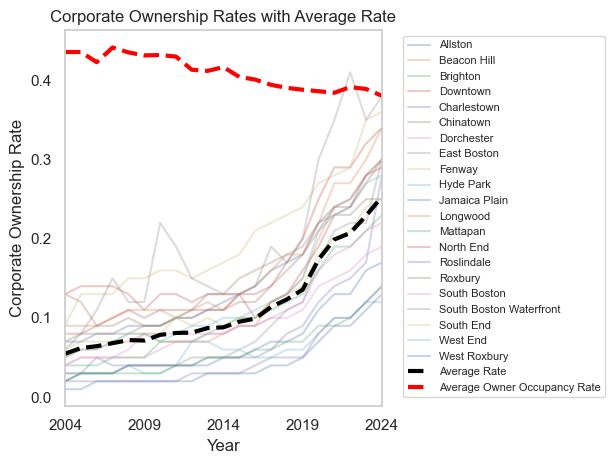

In [132]:
import matplotlib.pyplot as plt

# Import Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Corp_Ownership_and_Occupancy_Over_Time.csv")
corp_ownership = pd.read_csv(file_path)

# Calculate the average corporate ownership rate
average_rate = corp_ownership.groupby('Year')['corp_own_rate'].mean().reset_index()

# Plot individual neighborhoods
for i, neighborhood in enumerate(corp_ownership['Neighborhood'].unique()):
    neighborhood_data = corp_ownership[corp_ownership['Neighborhood'] == neighborhood]
    plt.plot(neighborhood_data['Year'], neighborhood_data['corp_own_rate'], label=neighborhood, alpha=0.3)

# Plot the average rate
plt.plot(average_rate['Year'], average_rate['corp_own_rate'], label='Average Rate',
         color='black', linewidth=3, linestyle='--')

#Plot the average of the owner occupancy rate
average_rate = corp_ownership.groupby('Year')['own_occ_rate'].mean().reset_index()
plt.plot(average_rate['Year'], average_rate['own_occ_rate'], label='Average Owner Occupancy Rate',
         color='red', linewidth=3, linestyle='--')

# Update legend and labels
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Corporate Ownership Rate')
plt.title('Corporate Ownership Rates with Average Rate')
plt.xticks(np.arange(2004, 2025, 5))
plt.xlim(2004, 2024)
plt.grid()
plt.tight_layout()
plt.savefig('Corporate_Ownership_Rates_with_Average.png', dpi=400, bbox_inches='tight')

plt.show()


In [133]:
def load_data(year):
    import os
    import pandas as pd
    import geopandas as gpd

    # Import Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
    file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024",
                             "Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv")
    census_corp_ownership = pd.read_csv(file_path)

    # Filter the census_corp_ownership DataFrame by the selected year
    census_corp_ownership = census_corp_ownership[census_corp_ownership['Year'] == year]

    # Import Boston_Neighborhoods_Zipcodes.csv from Data folder
    file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024",
                             "Boston_Neighborhoods_Zipcodes.csv")
    Boston_Neighborhoods_Zipcodes = pd.read_csv(file_path)

    # Add leading zeros to the zipcodes to make them 5 digits
    Boston_Neighborhoods_Zipcodes['Zip Code'] = Boston_Neighborhoods_Zipcodes['Zip Code'].apply(lambda x: '{0:0>5}'.format(x))

    # Import Boston.geojson from Data folder
    file_path = os.path.join("Data/BostonData", "boston.geojson")
    boston_geo = gpd.read_file(file_path)

    # Convert name in boston_geo to Neighborhood
    boston_geo['Neighborhood'] = boston_geo['name']
    # Remove unnecessary columns
    boston_geo = boston_geo.drop(columns=['created_at', 'updated_at', 'name'])

    # Merge census data with geographical data
    merged_data = boston_geo.merge(census_corp_ownership, on='Neighborhood', how='left')

    # Add the lat and lon of each neighborhood to the merged_data dataframe
    neighborhood_coords = {}
    for i, row in boston_geo.iterrows():
        neighborhood = row['Neighborhood']
        coords = row['geometry'].centroid.coords[:][0]
        neighborhood_coords[neighborhood] = [coords[1], coords[0]]

    # Add the coordinates to the merged_data dataframe
    merged_data['coords'] = merged_data['Neighborhood'].map(neighborhood_coords)
    merged_data[['lat', 'lon']] = pd.DataFrame(merged_data['coords'].tolist(), index=merged_data.index)
    merged_data = merged_data.drop(columns=['coords'])

    # Calculate the percentage for each race
    merged_data['white_percentage']  = (merged_data['white_all'] / merged_data['tot_pop_all']) * 100
    merged_data['black_percentage']  = (merged_data['black_all'] / merged_data['tot_pop_all']) * 100
    merged_data['aapi_percentage']   = (merged_data['aapi_all']  / merged_data['tot_pop_all']) * 100
    merged_data['hispanic_percentage'] = (merged_data['hisp_all']  / merged_data['tot_pop_all']) * 100
    merged_data['aian_percentage']   = (merged_data['aian_all']  / merged_data['tot_pop_all']) * 100
    merged_data['other_percentage']  = (merged_data['other_all'] / merged_data['tot_pop_all']) * 100

    # Calculate the sum and percentage of the non-white population
    merged_data['non_white_sum'] = (merged_data['black_all'] + merged_data['aapi_all'] +
                                    merged_data['hisp_all'] + merged_data['aian_all'] +
                                    merged_data['other_all'])
    merged_data['non_white_percentage'] = (merged_data['non_white_sum'] / merged_data['tot_pop_all']) * 100

    return merged_data

import folium

# Create the map centered on Boston
m = folium.Map(location=[42.32, -71.0589], zoom_start=11.95, min_zoom=11.95)

# Load initial data for the latest year
initial_year = 2024
merged_data = load_data(initial_year)

# Add the choropleth layer for non-white population percentage
folium.Choropleth(
    geo_data=merged_data,
    data=merged_data,
    columns=['Neighborhood', 'non_white_percentage'],
    key_on='feature.properties.Neighborhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Non-White Population Percentage (%)'
).add_to(m)

# Add markers with neighborhood names and race percentages in the tooltip
for _, row in merged_data.iterrows():
    neighborhood = row['Neighborhood']
    tooltip_text = (
        f"Neighborhood: {neighborhood}<br>"
        f"White: {row['white_percentage']:.2f}%<br>"
        f"Black: {row['black_percentage']:.2f}%<br>"
        f"AAPI: {row['aapi_percentage']:.2f}%<br>"
        f"Hispanic: {row['hispanic_percentage']:.2f}%<br>"
        f"American Indian/Alaskan Native: {row['aian_percentage']:.2f}%<br>"
        f"Other: {row['other_percentage']:.2f}%"
    )
    coords = (row['lat'], row['lon'])
    
    folium.CircleMarker(
        location=coords,
        radius=5,
        popup=f"{neighborhood}: {row['non_white_percentage']:.2f}% Non-White Population",
        tooltip=tooltip_text,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Save the map to an HTML file
m.save('Boston_Non_White_Population.html')
m


c:\Users\agrab\Anaconda3\envs\SAFNetwork\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\agrab\Anaconda3\envs\SAFNetwork\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [134]:
# Import Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv")
census_corp_ownership = pd.read_csv(file_path)

census_corp_ownership

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,nursing,other_inst,black_all,hisp_0_17,tot_unit,aapi_all,military,white_18plus,two_or_more_all,correctional,other_0_17,white_0_17,hisp_18plus,aian_18plus,two_or_more_18plus,black_0_17,vacant_unit,white_all,aian_0_17,other_noninst,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
0,Allston,2004,0.29,0.07,3214,26668,179,353,28621,273,26,0,1451,586,12527,7173,0,14022,1349,0,57,612,3071,18,1170,157,787,14634,9,150,1953,27,3390,11740,6820,0,330,3657,1294,1
1,Allston,2005,0.30,0.07,3214,26668,179,353,28621,273,26,0,1451,586,12527,7173,0,14022,1349,0,57,612,3071,18,1170,157,787,14634,9,150,1953,27,3390,11740,6820,0,330,3657,1294,1
2,Allston,2006,0.29,0.08,3214,26668,179,353,28621,273,26,0,1451,586,12527,7173,0,14022,1349,0,57,612,3071,18,1170,157,787,14634,9,150,1953,27,3390,11740,6820,0,330,3657,1294,1
3,Allston,2007,0.31,0.08,3214,26668,179,353,28621,273,26,0,1451,586,12527,7173,0,14022,1349,0,57,612,3071,18,1170,157,787,14634,9,150,1953,27,3390,11740,6820,0,330,3657,1294,1
4,Allston,2008,0.31,0.09,3214,26668,179,353,28621,273,26,0,1451,586,12527,7173,0,14022,1349,0,57,612,3071,18,1170,157,787,14634,9,150,1953,27,3390,11740,6820,0,330,3657,1294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,West Roxbury,2020,0.66,0.07,0,25457,412,450,31561,157,412,0,3312,1021,14070,2451,0,17676,1067,0,63,3242,2546,23,655,913,680,20918,3,93,6104,26,505,13390,2001,0,220,3567,2399,24
437,West Roxbury,2021,0.66,0.09,0,25457,412,450,31561,157,412,0,3312,1021,14070,2451,0,17676,1067,0,63,3242,2546,23,655,913,680,20918,3,93,6104,26,505,13390,2001,0,220,3567,2399,24
438,West Roxbury,2022,0.67,0.09,0,25457,412,450,31561,157,412,0,3312,1021,14070,2451,0,17676,1067,0,63,3242,2546,23,655,913,680,20918,3,93,6104,26,505,13390,2001,0,220,3567,2399,24
439,West Roxbury,2023,0.66,0.11,0,25457,412,450,31561,157,412,0,3312,1021,14070,2451,0,17676,1067,0,63,3242,2546,23,655,913,680,20918,3,93,6104,26,505,13390,2001,0,220,3567,2399,24


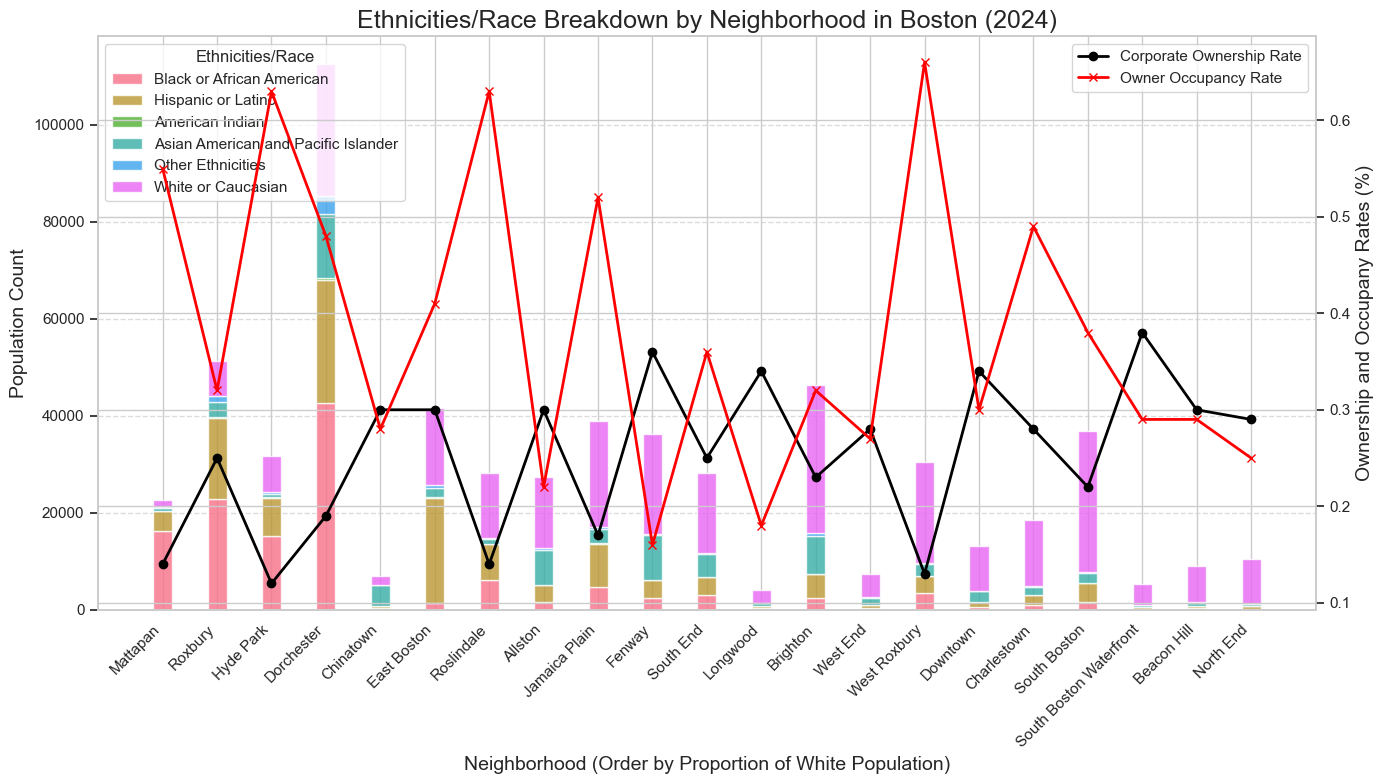

In [136]:
# Assuming 'own_occ_rate' column is available in the corporate ownership dataset (Corp_Ownership_and_Occupancy_Over_Time.csv)

# Load the dataset again (if necessary)
corp_ownership_2024 = corp_ownership[corp_ownership['Year'] == 2024].copy()

# Reorder corporate ownership DataFrame to follow the ordered neighborhoods
corp_ownership_2024['order'] = corp_ownership_2024['Neighborhood'].map(order_map)
corp_ownership_2024 = corp_ownership_2024.sort_values('order')

# Create a figure and a primary axis
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot the stacked bar plot for ethnicities as before
bar_width = 0.35
bar_positions = np.arange(len(ordered_neighborhoods))

# Create a stacked bar plot for the ethnicities per neighborhood
colors = sns.color_palette("husl", len(ethnicities_columns))
for i, column in enumerate(ethnicities_columns):
    if i > 0:
        bottom_values = data_for_plot[ethnicities_columns[:i]].sum(axis=1)
    else:
        bottom_values = 0
    plt.bar(bar_positions, 
            data_for_plot[column], 
            bottom=bottom_values, 
            width=bar_width,
            label=ethnicity_labels[i],
            color=colors[i], 
            alpha=0.8)

# Customize the stacked bar plot
plt.title('Ethnicities/Race Breakdown by Neighborhood in Boston (2024)', fontsize=18)
plt.xlabel('Neighborhood (Order by Proportion of White Population)', fontsize=14)
plt.ylabel('Population Count', fontsize=14)
plt.xticks(bar_positions, ordered_neighborhoods, rotation=45, ha='right')
plt.legend(title='Ethnicities/Race', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a twin axis for Corporate Ownership Rate and Occupancy Rate
ax2 = plt.twinx()

# Plot Corporate Ownership Rate
ax2.plot(np.arange(len(corp_ownership_2024)), 
         corp_ownership_2024['corp_own_rate'], 
         color='black', marker='o', linewidth=2, label='Corporate Ownership Rate')

# Plot Own Occupancy Rate
ax2.plot(np.arange(len(corp_ownership_2024)), 
         corp_ownership_2024['own_occ_rate'], 
         color='red', marker='x', linewidth=2, label='Owner Occupancy Rate')

# Set labels for twin axes
ax2.set_ylabel('Ownership and Occupany Rates (%)', fontsize=14)

# Add legends for the twin axis
ax2.legend(loc='upper right')

# Adjust the layout to ensure nothing gets cut off
plt.tight_layout()
plt.savefig('Ethnicity_Breakdown_Neighborhoods_Boston_Stacked_Bar_with_Own_Occupancy_Rate.png', dpi=400, bbox_inches='tight')
plt.show()
